# 캐치한 이미지, 회전시키기

## 1. 배경을 최소화하고 특이점을 찾자. 
- 1) 가우시안blur로 노이즈를 제거, Canny로 테두리만 찾고, Canny의 kp를 찾아서 거리가 가장 긴 부분을 찾아보자.


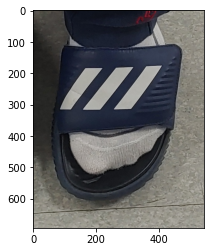

In [235]:
# 이미지 불러오기
import cv2 
import numpy as np
import matplotlib.pyplot as plt
img_orin = cv2.imread('data_new/obj_num_0.jpg')
img_orin = cv2.cvtColor(img_orin, cv2.COLOR_BGR2RGB)
plt.imshow(img_orin)

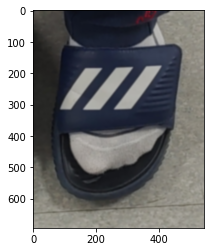

In [123]:
## GaussianBlur를 통한 이미지 노이즈 제거
img_gaus = cv2.GaussianBlur(img_orin, (13,13),0)
plt.imshow(img_gaus)

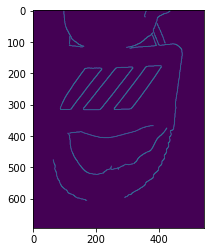

In [124]:
## Canny를 통한 테두리 찾기
img_canny = cv2.Canny(img_gaus,50, 120)

# thershold1, thershold2 값 ==> 50, 100일 때, 신발에 필요 없는 바닥 라인이 살아 있음
plt.imshow(img_canny)

In [125]:
# 값이 255인, canny를 통해 출력된 테두리 값을 저장하기
kp_list = []
for i in range(img_canny.shape[0]):
    for j in range(img_canny.shape[1]):
          if img_canny[i][j]== 255:
                kp_list.append([i, j])
print(kp_list)

[[0, 3], [0, 98], [0, 360], [0, 436], [1, 3], [1, 98], [1, 360], [1, 436], [2, 3], [2, 4], [2, 98], [2, 360], [2, 436], [2, 437], [3, 0], [3, 1], [3, 2], [3, 3], [3, 98], [3, 360], [3, 435], [3, 436], [4, 2], [4, 98], [4, 360], [4, 434], [4, 435], [5, 98], [5, 359], [5, 433], [5, 434], [6, 98], [6, 359], [6, 431], [6, 432], [7, 98], [7, 358], [7, 430], [7, 431], [8, 98], [8, 358], [8, 428], [8, 429], [9, 98], [9, 358], [9, 425], [9, 426], [9, 427], [10, 98], [10, 357], [10, 421], [10, 422], [10, 423], [10, 424], [11, 98], [11, 357], [11, 417], [11, 418], [11, 419], [11, 420], [12, 98], [12, 357], [12, 415], [12, 416], [12, 417], [13, 98], [13, 356], [13, 413], [13, 414], [13, 415], [14, 99], [14, 356], [14, 411], [14, 412], [14, 413], [15, 99], [15, 356], [15, 410], [15, 411], [16, 99], [16, 356], [16, 408], [16, 409], [17, 99], [17, 355], [17, 405], [17, 406], [17, 407], [17, 408], [18, 99], [18, 355], [18, 403], [18, 404], [18, 405], [19, 99], [19, 355], [19, 402], [19, 403], [20, 99

In [126]:
# 두 점사이의 거리 구하는 공식
import math

def kp_dis(a_list, b_list) : 
    x_1, x_2 = a_list
    y_1, y_2 = b_list
    distance = (math.sqrt((x_1 - y_1)**2 +(x_2 - y_2)**2))
    
    return distance

In [127]:
# 가장 거리가 먼 점을 찾아보자
max_dist = 0
max_pt = []
for i,kp in enumerate(kp_list) : 
    for j in range(i, len(kp_list)) : 
        dist = kp_dis(kp, kp_list[j])
        if dist > max_dist : 
            max_dist = dist
            max_pt = []
            max_pt.append(kp)
            max_pt.append(kp_list[j])

In [128]:
# 가장 거리가 먼 점, 거리
max_pt, max_dist

([[0, 436], [598, 141]], 666.8050689669358)

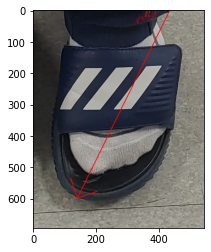

In [129]:
# 가장 먼 거리의 점을 그림에 표기해보자

im_arr = cv2.arrowedLine(img_orin, (436,0),(141,598), (255,0,0), 2)
 
plt.imshow(im_arr)

## 다른 이미지에도 적용이 될까?

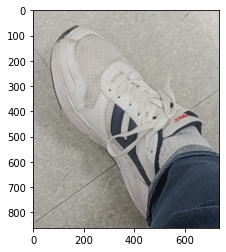

In [236]:
# 이미지 불러오기
import cv2 
import numpy as np
import matplotlib.pyplot as plt
img_orin = cv2.imread('data_new/obj_num_1.jpg')
img_orin = cv2.cvtColor(img_orin, cv2.COLOR_BGR2RGB)
plt.imshow(img_orin)

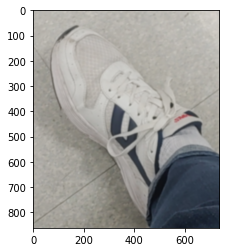

In [143]:
## GaussianBlur를 통한 이미지 노이즈 제거
img_gaus = cv2.GaussianBlur(img_orin, (13,13),0)
plt.imshow(img_gaus)

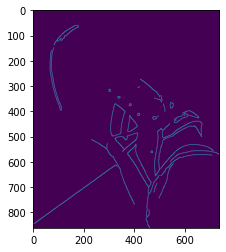

In [144]:
## Canny를 통한 테두리 찾기
img_canny = cv2.Canny(img_gaus,50, 120)

# thershold1, thershold2 값 ==> 50, 100일 때, 신발에 필요 없는 바닥 라인이 살아 있음
plt.imshow(img_canny)

In [145]:
# 값이 255인, canny를 통해 출력된 테두리 값을 저장하기
kp_list = []
for i in range(img_canny.shape[0]):
    for j in range(img_canny.shape[1]):
          if img_canny[i][j]== 255:
                kp_list.append([i, j])
print(kp_list)

[[60, 170], [60, 171], [60, 172], [60, 173], [60, 174], [61, 166], [61, 167], [61, 168], [61, 169], [61, 175], [61, 176], [61, 177], [62, 163], [62, 164], [62, 165], [62, 177], [62, 178], [62, 179], [63, 161], [63, 162], [63, 163], [64, 159], [64, 160], [64, 161], [64, 179], [65, 157], [65, 158], [65, 159], [65, 179], [66, 155], [66, 156], [66, 157], [66, 178], [66, 179], [66, 180], [67, 154], [67, 155], [67, 177], [67, 178], [68, 152], [68, 153], [68, 154], [68, 175], [68, 176], [68, 177], [69, 151], [69, 152], [69, 173], [69, 174], [69, 175], [70, 149], [70, 150], [70, 170], [70, 171], [70, 172], [70, 173], [71, 147], [71, 148], [71, 149], [71, 167], [71, 168], [71, 169], [72, 145], [72, 146], [72, 147], [72, 166], [72, 167], [73, 143], [73, 144], [73, 145], [73, 165], [73, 166], [74, 142], [74, 143], [74, 163], [74, 164], [75, 140], [75, 141], [75, 142], [75, 161], [75, 162], [75, 163], [76, 139], [76, 140], [76, 160], [76, 161], [77, 137], [77, 138], [77, 158], [77, 159], [77, 160]

In [4]:
# 두 점사이의 거리 구하는 공식
import math

def kp_dis(a_list, b_list) : 
    x_1, x_2 = a_list
    y_1, y_2 = b_list
    distance = (math.sqrt((x_1 - y_1)**2 +(x_2 - y_2)**2))
    
    return distance

In [5]:
# 가장 거리가 먼 점을 찾아보자
max_dist = 0
max_pt = []
for i,kp in enumerate(kp_list) : 
    for j in range(i, len(kp_list)) : 
        dist = kp_dis(kp, kp_list[j])
        if dist > max_dist : 
            max_dist = dist
            max_pt = []
            max_pt.append(kp)
            max_pt.append(kp_list[j])

NameError: name 'kp_list' is not defined

In [148]:
# 가장 거리가 먼 점, 거리
max_pt, max_dist

([[62, 163], [861, 460]], 852.4142185580905)

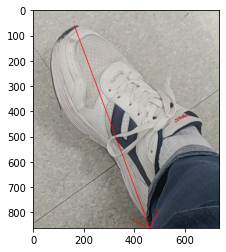

In [149]:
# 가장 먼 거리의 점을 그림에 표기해보자

im_arr = cv2.arrowedLine(img_orin, (163,62),(460, 861), (255,0,0), 2)
 
plt.imshow(im_arr)

In [140]:
img_orin.shape

(862, 738, 3)

## 함수 만들어보자



In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

def find_want_arr (img) :
    img_orin = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    ## GaussianBlur를 통한 이미지 노이즈 제거
    img_gaus = cv2.GaussianBlur(img_orin, (13,13),0)

    ## Canny를 통한 테두리 찾기
    img_canny = cv2.Canny(img_gaus,50, 120)
    
    # 값이 255인, canny를 통해 출력된 테두리 값을 저장하기
    kp_list = []
    for i in range(img_canny.shape[0]):
        for j in range(img_canny.shape[1]):
              if img_canny[i][j]== 255:
                    kp_list.append([i, j])
    max_dist = 0
    max_pt = []
    
    for i,kp in enumerate(kp_list) : 
        for j in range(i, len(kp_list)) : 
            dist = kp_dis(kp, kp_list[j])
            if dist > max_dist : 
                max_dist = dist
                max_pt = []
                max_pt.append(kp)
                max_pt.append(kp_list[j])
                
    x_1, y_1 = max_pt[0]
    x_2, y_2 = max_pt[1]
    x_3, y_3 = x_2, img.shape[1]
        
    im_arr = cv2.arrowedLine(img_orin, (y_1,x_1), (y_2, x_2), (255,0,0), 2)
    im_arr = cv2.arrowedLine(im_arr, (y_2, x_2), (y_3, x_3),(255,0,0), 2)
    print(max_pt[0], max_pt[1])

    plt.imshow(im_arr)

In [3]:
img_shoes = cv2.imread('data_new/obj_num_2.jpg')
find_want_arr(img_shoes)

NameError: name 'kp_dis' is not defined

In [ ]:
img_shoes = cv2.imread('data_new/boots3.jpg')
find_want_arr(img_shoes)

In [306]:
## 각 구하기
def find_angle ( img, list_1, list_2):
    x_1, y_1 = list_1 # 첫번 째 점
    x_2, y_2 = list_2 # 중앙에 있는 점
    
    # 마지막 점 생성하기
    x_3, y_3 = x_2, img.shape[1]
    
    line_1 = math.sqrt((x_2 - x_1)**2 +(y_2 - y_1)**2)
    line_2 = y_3 - y_2
    
    angle = float(np.rad2deg(np.arccos(line_2/line_1)))
    if x_2 - x_1> 0:
        angle = 180 - angle
    
    return angle
    
    

In [286]:
max_pt= [[62, 163], [861, 400]]
a, b =  max_pt[0], max_pt[1]
x_1, y_1 = a # 첫번 째 점
x_2, y_2 = b
x_3, y_3 = x_2, img_orin.shape[1]

In [290]:
type(x_1), type(y_3) 

(int, int)

In [294]:
line_1 = math.sqrt((x_2 - x_1)**2 +(y_2 - y_1)**2)
line_2 = y_3 - y_2

type(np.arccos(line_2/line_1))



numpy.float64

In [295]:
type(np.rad2deg((np.arccos(line_2/line_1))))

numpy.float64

In [298]:
angle = (np.rad2deg(np.arccos(line_2/line_1)))
type(angle)

numpy.float64

In [299]:
if x_2 - x_1> 0:
    angle = 180 - angle

print(angle)

113.92643365986022


In [300]:
type(angle)

numpy.float64

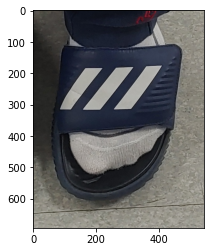

In [302]:
# 이미지 불러오기
import cv2 
import numpy as np
import matplotlib.pyplot as plt
img_orin = cv2.imread('data_new/obj_num_0.jpg')
img_orin = cv2.cvtColor(img_orin, cv2.COLOR_BGR2RGB)
plt.imshow(img_orin)

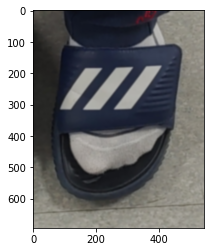

In [122]:
# 노이즈 제거 (Gaussianblur)
img_a = cv2.GaussianBlur(img_s, (13,13), 0)
plt.imshow(img_1)

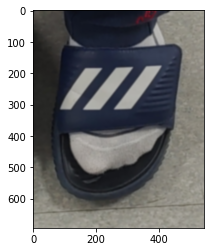

In [123]:
## GaussianBlur를 통한 이미지 노이즈 제거
img_gaus = cv2.GaussianBlur(img_orin, (13,13),0)
plt.imshow(img_gaus)

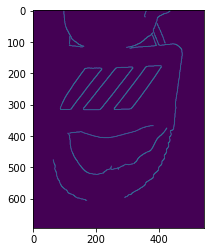

In [124]:
## Canny를 통한 테두리 찾기
img_canny = cv2.Canny(img_gaus,50, 120)

# thershold1, thershold2 값 ==> 50, 100일 때, 신발에 필요 없는 바닥 라인이 살아 있음
plt.imshow(img_canny)

In [125]:
# 값이 255인, canny를 통해 출력된 테두리 값을 저장하기
kp_list = []
for i in range(img_canny.shape[0]):
    for j in range(img_canny.shape[1]):
          if img_canny[i][j]== 255:
                kp_list.append([i, j])
print(kp_list)

[[0, 3], [0, 98], [0, 360], [0, 436], [1, 3], [1, 98], [1, 360], [1, 436], [2, 3], [2, 4], [2, 98], [2, 360], [2, 436], [2, 437], [3, 0], [3, 1], [3, 2], [3, 3], [3, 98], [3, 360], [3, 435], [3, 436], [4, 2], [4, 98], [4, 360], [4, 434], [4, 435], [5, 98], [5, 359], [5, 433], [5, 434], [6, 98], [6, 359], [6, 431], [6, 432], [7, 98], [7, 358], [7, 430], [7, 431], [8, 98], [8, 358], [8, 428], [8, 429], [9, 98], [9, 358], [9, 425], [9, 426], [9, 427], [10, 98], [10, 357], [10, 421], [10, 422], [10, 423], [10, 424], [11, 98], [11, 357], [11, 417], [11, 418], [11, 419], [11, 420], [12, 98], [12, 357], [12, 415], [12, 416], [12, 417], [13, 98], [13, 356], [13, 413], [13, 414], [13, 415], [14, 99], [14, 356], [14, 411], [14, 412], [14, 413], [15, 99], [15, 356], [15, 410], [15, 411], [16, 99], [16, 356], [16, 408], [16, 409], [17, 99], [17, 355], [17, 405], [17, 406], [17, 407], [17, 408], [18, 99], [18, 355], [18, 403], [18, 404], [18, 405], [19, 99], [19, 355], [19, 402], [19, 403], [20, 99

In [126]:
# 두 점사이의 거리 구하는 공식
import math

def kp_dis(a_list, b_list) : 
    x_1, x_2 = a_list
    y_1, y_2 = b_list
    distance = (math.sqrt((x_1 - y_1)**2 +(x_2 - y_2)**2))
    
    return distance

In [127]:
# 가장 거리가 먼 점을 찾아보자
max_dist = 0
max_pt = []
for i,kp in enumerate(kp_list) : 
    for j in range(i, len(kp_list)) : 
        dist = kp_dis(kp, kp_list[j])
        if dist > max_dist : 
            max_dist = dist
            max_pt = []
            max_pt.append(kp)
            max_pt.append(kp_list[j])

In [128]:
# 가장 거리가 먼 점, 거리
max_pt, max_dist

([[0, 436], [598, 141]], 666.8050689669358)

In [297]:
angle

113.92643365986022

In [282]:
angle = (find_angle(img_orin, a, b))

113.92643365986022


In [283]:
type(angle)

NoneType

In [269]:
type(60)

int

[62, 163] [861, 460]


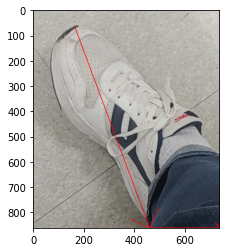

In [308]:
img_shoes = cv2.imread('data_new/obj_num_1.jpg')
find_want_arr(img_shoes)

In [263]:
rot_img = cv2.getRotationMatrix2D((399, 148), int(180-angle), 1)

TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

In [304]:
def find_angle ( img, list_1, list_2):
    x_1, y_1 = list_1 # 첫번 째 점
    x_2, y_2 = list_2 # 중앙에 있는 점
    
    # 마지막 점 생성하기
    x_3, y_3 = x_2, img.shape[1]
    
    line_1 = math.sqrt((x_2 - x_1)**2 +(y_2 - y_1)**2)
    line_2 = y_3 - y_2
    
    angle = float(np.rad2deg(np.arccos(line_2/line_1)))
    if x_2 - x_1> 0:
        angle = 180 - angle
    
    return angle

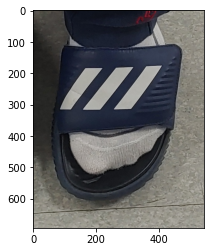

In [121]:
# 이미지 불러오기
import cv2 
import numpy as np
import matplotlib.pyplot as plt
img_orin = cv2.imread('data_new/obj_num_0.jpg')
img_orin = cv2.cvtColor(img_orin, cv2.COLOR_BGR2RGB)
plt.imshow(img_orin)

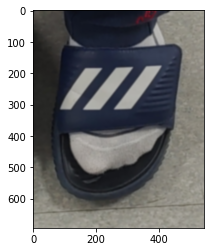

In [122]:
# 노이즈 제거 (Gaussianblur)
img_a = cv2.GaussianBlur(img_s, (13,13), 0)
plt.imshow(img_1)

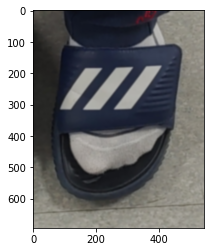

In [123]:
## GaussianBlur를 통한 이미지 노이즈 제거
img_gaus = cv2.GaussianBlur(img_orin, (13,13),0)
plt.imshow(img_gaus)

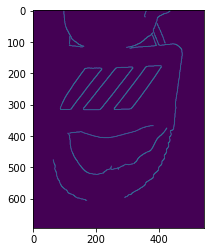

In [124]:
## Canny를 통한 테두리 찾기
img_canny = cv2.Canny(img_gaus,50, 120)

# thershold1, thershold2 값 ==> 50, 100일 때, 신발에 필요 없는 바닥 라인이 살아 있음
plt.imshow(img_canny)

In [125]:
# 값이 255인, canny를 통해 출력된 테두리 값을 저장하기
kp_list = []
for i in range(img_canny.shape[0]):
    for j in range(img_canny.shape[1]):
          if img_canny[i][j]== 255:
                kp_list.append([i, j])
print(kp_list)

[[0, 3], [0, 98], [0, 360], [0, 436], [1, 3], [1, 98], [1, 360], [1, 436], [2, 3], [2, 4], [2, 98], [2, 360], [2, 436], [2, 437], [3, 0], [3, 1], [3, 2], [3, 3], [3, 98], [3, 360], [3, 435], [3, 436], [4, 2], [4, 98], [4, 360], [4, 434], [4, 435], [5, 98], [5, 359], [5, 433], [5, 434], [6, 98], [6, 359], [6, 431], [6, 432], [7, 98], [7, 358], [7, 430], [7, 431], [8, 98], [8, 358], [8, 428], [8, 429], [9, 98], [9, 358], [9, 425], [9, 426], [9, 427], [10, 98], [10, 357], [10, 421], [10, 422], [10, 423], [10, 424], [11, 98], [11, 357], [11, 417], [11, 418], [11, 419], [11, 420], [12, 98], [12, 357], [12, 415], [12, 416], [12, 417], [13, 98], [13, 356], [13, 413], [13, 414], [13, 415], [14, 99], [14, 356], [14, 411], [14, 412], [14, 413], [15, 99], [15, 356], [15, 410], [15, 411], [16, 99], [16, 356], [16, 408], [16, 409], [17, 99], [17, 355], [17, 405], [17, 406], [17, 407], [17, 408], [18, 99], [18, 355], [18, 403], [18, 404], [18, 405], [19, 99], [19, 355], [19, 402], [19, 403], [20, 99

In [126]:
# 두 점사이의 거리 구하는 공식
import math

def kp_dis(a_list, b_list) : 
    x_1, x_2 = a_list
    y_1, y_2 = b_list
    distance = (math.sqrt((x_1 - y_1)**2 +(x_2 - y_2)**2))
    
    return distance

In [127]:
# 가장 거리가 먼 점을 찾아보자
max_dist = 0
max_pt = []
for i,kp in enumerate(kp_list) : 
    for j in range(i, len(kp_list)) : 
        dist = kp_dis(kp, kp_list[j])
        if dist > max_dist : 
            max_dist = dist
            max_pt = []
            max_pt.append(kp)
            max_pt.append(kp_list[j])

In [128]:
# 가장 거리가 먼 점, 거리
max_pt, max_dist

([[0, 436], [598, 141]], 666.8050689669358)

In [309]:
b =  find_angle(img_shoes, [436, 0], [141,598])

In [312]:
b

77.88020209126111

In [315]:
c,d = 147.5, 299

In [316]:
new_im= cv2.getRotationMatrix2D((c,d), b, 1.0)
print(new_im)

[[ 2.09956412e-01  9.77710747e-01 -1.75804084e+02]
 [-9.77710747e-01  2.09956412e-01  3.80435368e+02]]


In [320]:
w, h = img_shoes.shape[1], img_shoes.shape[0]
output_size = (w,h)
rotated_flower = cv2.warpAffine(img_shoes,new_im,output_size)

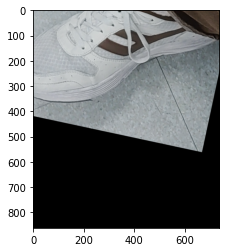

In [321]:
plt.imshow(rotated_flower)

## 함수 합치기

In [59]:
# 이미지 돌리기 전 까지의 코드
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from copy import copy

class rotated_img : 

    def __init__(self, path):
        self.path = path
        self.file_name = path.split('/')[-1]
        self.img = cv2.imread(path, cv2.IMREAD_COLOR)
                
        
    def kp_dist(self,a_list,b_list): 
        x_1, x_2 = a_list
        y_1, y_2 = b_list
        distance = (math.sqrt((x_1 - y_1)**2 +(x_2 - y_2)**2))
    
        return distance   
        
    def find_angle (self, list_1, list_2):
        x_1, y_1 = list_1 # 첫번 째 점
        x_2, y_2 = list_2 # 중앙에 있는 점
        
        # 마지막 점 생성하기
        x_3, y_3 = x_2, self.img.shape[1]
        
        line_1 = math.sqrt((x_2 - x_1)**2 +(y_2 - y_1)**2)
        line_2 = y_3 - y_2
        
        angle = float(np.rad2deg(np.arccos(line_2/line_1)))
        if x_2 > x_1 :
            angle = 180 - angle

        return angle
        
    def find_want_arr(self):
    
        ## GaussianBlur를 통한 이미지 노이즈 제거
        img_gaus = cv2.GaussianBlur(self.img, (13,13),0)

        ## Canny를 통한 테두리 찾기
        img_canny = cv2.Canny(img_gaus,50, 120)
        
        # 값이 255인, canny를 통해 출력된 테두리 값을 저장하기
        kp_list = []
        for i in range(img_canny.shape[0]):
            for j in range(img_canny.shape[1]):
                  if img_canny[i][j]== 255:
                        kp_list.append([i, j])
        max_dist = 0
        max_pt = []
        
        ilist = copy(kp_list)
        for i,kp in enumerate(kp_list) : 
            for j in range(i, len(ilist)) : 
                dist = self.kp_dist(kp, ilist[j])
          
                if dist > max_dist : 
                    max_dist = dist
                    max_pt = []
                    max_pt.append(kp)
                    max_pt.append(kp_list[j])
                    
        x_1, y_1 = max_pt[0]
        x_2, y_2 = max_pt[1]
        x_3, y_3 = x_2, self.img.shape[1]
            
        copy_img = self.img
        im_arr = cv2.arrowedLine(copy_img, (y_1,x_1), (y_2, x_2), (255,0,0), 2)
        im_arr = cv2.arrowedLine(im_arr, (y_2, x_2), (y_3, x_3),(255,0,0), 2)
        print(max_pt[0], max_pt[1])

        plt.imshow(im_arr)
    
    def rotated (self) :
    
        ## GaussianBlur를 통한 이미지 노이즈 제거
        img_gaus = cv2.GaussianBlur(self.img, (13,13),0)

        ## Canny를 통한 테두리 찾기
        img_canny = cv2.Canny(img_gaus,50, 120)
        
        # 값이 255인, canny를 통해 출력된 테두리 값을 저장하기
        kp_list = []
        for i in range(img_canny.shape[0]):
            for j in range(img_canny.shape[1]):
                  if img_canny[i][j]== 255:
                        kp_list.append([i, j])
        max_dist = 0
        max_pt = []
        
        for i,kp in enumerate(kp_list) : 
            for j in range(i, len(kp_list)) : 
                dist = self.kp_dist(kp, kp_list[j])
                if dist > max_dist : 
                    max_dist = dist
                    max_pt = []
                    max_pt.append(kp)
                    max_pt.append(kp_list[j])
                    
        x_1, y_1 = max_pt[0]
        x_2, y_2 = max_pt[1]
        
        list_x = [y_1, x_1]
        list_y = [y_2, x_2]
        img_angle = self.find_angle(list_x, list_y)
        
        half_x = int((x_2 + x_1)/2)
        half_y = int((y_2 + y_1)/2)
        rot_matrix= cv2.getRotationMatrix2D((half_x,half_y), img_angle, 0.7)
        
        
        img_w, img_h =   self.img.shape[0], self.img.shape[1]
        
        rotated_im = cv2.warpAffine(self.img, rot_matrix, (img_w, img_h))
        plt.imshow(rotated_im)
        #cv2.imwrite(f'data_new/rotated_{self.file_name}.jpg',rotated_im)
        #print("Image Saving is Complete")
        #print("***"*7)


# 최적의 image 위치 찾기

## 테스트 1. angle 그대로

In [1]:
# 이미지 돌리기 전 까지의 코드
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from copy import copy

class rotated_img : 

    def __init__(self, path):
        self.path = path
        self.file_name = path.split('/')[-1]
        self.img = cv2.imread(path, cv2.IMREAD_COLOR)
                
        
    def kp_dist(self,a_list,b_list): 
        x_1, x_2 = a_list
        y_1, y_2 = b_list
        distance = (math.sqrt((x_1 - y_1)**2 +(x_2 - y_2)**2))
    
        return distance   
        
    def find_angle (self, list_1, list_2):
        x_1, y_1 = list_1 # 첫번 째 점
        x_2, y_2 = list_2 # 중앙에 있는 점
        
        # 마지막 점 생성하기
        x_3, y_3 = x_2, self.img.shape[1]
        
        line_1 = math.sqrt((x_2 - x_1)**2 +(y_2 - y_1)**2)
        line_2 = y_3 - y_2
        
        angle = float(np.rad2deg(np.arccos(line_2/line_1)))

        return angle
        
    def find_want_arr(self):
    
        ## GaussianBlur를 통한 이미지 노이즈 제거
        img_gaus = cv2.GaussianBlur(self.img, (13,13),0)

        ## Canny를 통한 테두리 찾기
        img_canny = cv2.Canny(img_gaus,50, 120)
        
        # 값이 255인, canny를 통해 출력된 테두리 값을 저장하기
        kp_list = []
        for i in range(img_canny.shape[0]):
            for j in range(img_canny.shape[1]):
                  if img_canny[i][j]== 255:
                        kp_list.append([i, j])
        max_dist = 0
        max_pt = []
        
        ilist = copy(kp_list)
        for i,kp in enumerate(kp_list) : 
            for j in range(i, len(ilist)) : 
                dist = self.kp_dist(kp, ilist[j])
          
                if dist > max_dist : 
                    max_dist = dist
                    max_pt = []
                    max_pt.append(kp)
                    max_pt.append(kp_list[j])
                    
        x_1, y_1 = max_pt[0]
        x_2, y_2 = max_pt[1]
        x_3, y_3 = x_2, self.img.shape[1]
            
        copy_img = self.img
        im_arr = cv2.arrowedLine(copy_img, (y_1,x_1), (y_2, x_2), (255,0,0), 2)
        im_arr = cv2.arrowedLine(im_arr, (y_2, x_2), (y_3, x_3),(255,0,0), 2)
        print(max_pt[0], max_pt[1])

        plt.imshow(im_arr)
    
    def rotated (self) :
    
        ## GaussianBlur를 통한 이미지 노이즈 제거
        img_gaus = cv2.GaussianBlur(self.img, (13,13),0)

        ## Canny를 통한 테두리 찾기
        img_canny = cv2.Canny(img_gaus,50, 120)
        
        # 값이 255인, canny를 통해 출력된 테두리 값을 저장하기
        kp_list = []
        for i in range(img_canny.shape[0]):
            for j in range(img_canny.shape[1]):
                  if img_canny[i][j]== 255:
                        kp_list.append([i, j])
        max_dist = 0
        max_pt = []
        
        for i,kp in enumerate(kp_list) : 
            for j in range(i, len(kp_list)) : 
                dist = self.kp_dist(kp, kp_list[j])
                if dist > max_dist : 
                    max_dist = dist
                    max_pt = []
                    max_pt.append(kp)
                    max_pt.append(kp_list[j])
                    
        x_1, y_1 = max_pt[0]
        x_2, y_2 = max_pt[1]
        
        list_x = [y_1, x_1]
        list_y = [y_2, x_2]
        img_angle = self.find_angle(list_x, list_y)
        
        half_x = int((x_2 + x_1)/2)
        half_y = int((y_2 + y_1)/2)
        rot_matrix= cv2.getRotationMatrix2D((half_x,half_y), img_angle, 0.7)
        
        
        img_w, img_h =   self.img.shape[0], self.img.shape[1]
        
        rotated_im = cv2.warpAffine(self.img, rot_matrix, (img_w, img_h))
        plt.imshow(rotated_im)
        #cv2.imwrite(f'data_new/rotated_{self.file_name}.jpg',rotated_im)
        #print("Image Saving is Complete")
        #print("***"*7)


In [2]:
img_t = rotated_img('data_new/obj_num_2.jpg')

[128, 196] [960, 640]


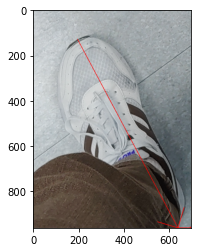

In [3]:
img_t.find_want_arr()

In [4]:
img_t.find_angle([128, 196],[960, 640])

86.47397005461934

In [5]:
img = cv2.imread('data_new/obj_num_2.jpg')

In [6]:
img.shape

(961, 698, 3)

In [10]:
list_1 = [128, 196]
list_2 = [960, 640]

x_1, y_1 = list_1 # 첫번 째 점
x_2, y_2 = list_2 # 중앙에 있는 점

# 마지막 점 생성하기
x_3, y_3 = x_2, img.shape[1]

if y_2 > y_1 : 
    line_1 = (-1) * math.sqrt((x_2 - x_1)**2 +(y_2 - y_1)**2)
    line_2 = y_3 - y_2
else : 
    line_1 = math.sqrt((x_2 - x_1)**2 +(y_2 - y_1)**2)
    line_2 = y_3 - y_2
angle = float(np.rad2deg(np.arccos(line_2/line_1)))
print(angle)

93.52602994538066


In [88]:
np.rad2deg(np.arccos(1/2))

60.00000000000001

In [106]:
np.cos((np.pi*2/3))

-0.4999999999999998

In [108]:
np.rad2deg(np.arccos(-0.5))

120.00000000000001

In [101]:
((30))

30

In [ ]:
np.cos

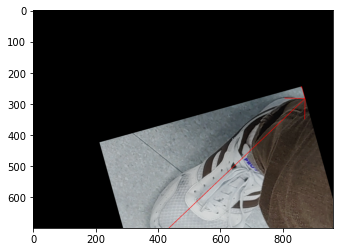

In [64]:
img_t.rotated()

In [65]:
img_t_0 = rotated_img('data_new/obj_num_0.jpg')

[0, 436] [598, 141]


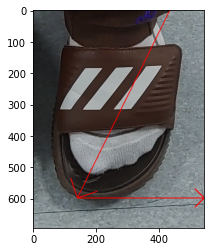

In [66]:
img_t_0.find_want_arr()

In [67]:
img_t_0.find_angle([0, 436], [598, 141])

52.70822375640569

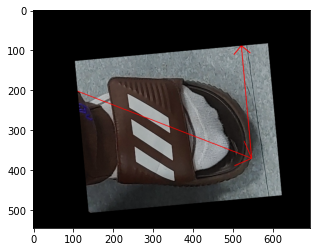

In [68]:
img_t_0.rotated()

In [69]:
img_t_1 = rotated_img('data_new/obj_num_1.jpg')

[62, 163] [861, 460]


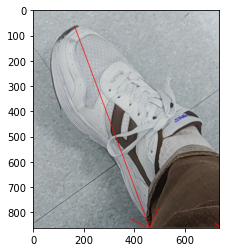

In [70]:
img_t_1.find_want_arr()

In [71]:
img_t_1.find_angle([62, 163],[861, 460])

70.96579731009729

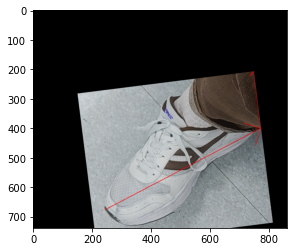

In [72]:
img_t_1.rotated()

## 테스트 2. y_2>y_1일 때 line_1의 값에 -1을 곱하기. 
 - y_2>y_1일 때 line_1의 값에 -1을 곱해, 좌표에서의 각도가 90보다 클 경우 90보다 각도가 큰 것을 인지시켜, 회전시키기

In [60]:
# 이미지 돌리기 전 까지의 코드
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from copy import copy

class rotated_img : 

    def __init__(self, path):
        self.path = path
        self.file_name = path.split('/')[-1]
        self.img = cv2.imread(path, cv2.IMREAD_COLOR)
                
        
    def kp_dist(self,a_list,b_list): 
        x_1, x_2 = a_list
        y_1, y_2 = b_list
        distance = (math.sqrt((x_1 - y_1)**2 +(x_2 - y_2)**2))
    
        return distance   
        
    def find_angle (self, list_1, list_2):
        x_1, y_1 = list_1 # 첫번 째 점
        x_2, y_2 = list_2 # 중앙에 있는 점
        
        # 마지막 점 생성하기
        x_3, y_3 = x_2, self.img.shape[1]

        if y_2 > y_1 : 
            line_1 = (-1) * math.sqrt((x_2 - x_1)**2 +(y_2 - y_1)**2)
            line_2 = y_3 - y_2
        else : 
            line_1 = math.sqrt((x_2 - x_1)**2 +(y_2 - y_1)**2)
            line_2 = y_3 - y_2
        
        angle = float(np.rad2deg(np.arccos(line_2/line_1)))

        return angle
        
    def find_want_arr(self):
    
        ## GaussianBlur를 통한 이미지 노이즈 제거
        img_gaus = cv2.GaussianBlur(self.img, (13,13),0)

        ## Canny를 통한 테두리 찾기
        img_canny = cv2.Canny(img_gaus,50, 120)
        
        # 값이 255인, canny를 통해 출력된 테두리 값을 저장하기
        kp_list = []
        for i in range(img_canny.shape[0]):
            for j in range(img_canny.shape[1]):
                  if img_canny[i][j]== 255:
                        kp_list.append([i, j])
        max_dist = 0
        max_pt = []
        
        ilist = copy(kp_list)
        for i,kp in enumerate(kp_list) : 
            for j in range(i, len(ilist)) : 
                dist = self.kp_dist(kp, ilist[j])
          
                if dist > max_dist : 
                    max_dist = dist
                    max_pt = []
                    max_pt.append(kp)
                    max_pt.append(kp_list[j])
                    
        x_1, y_1 = max_pt[0]
        x_2, y_2 = max_pt[1]
        x_3, y_3 = x_2, self.img.shape[1]
            
        copy_img = self.img
        im_arr = cv2.arrowedLine(copy_img, (y_1,x_1), (y_2, x_2), (255,0,0), 2)
        im_arr = cv2.arrowedLine(im_arr, (y_2, x_2), (y_3, x_3),(255,0,0), 2)
        print(max_pt[0], max_pt[1])

        plt.imshow(im_arr)
    
    def rotated (self) :
    
        ## GaussianBlur를 통한 이미지 노이즈 제거
        img_gaus = cv2.GaussianBlur(self.img, (13,13),0)

        ## Canny를 통한 테두리 찾기
        img_canny = cv2.Canny(img_gaus,50, 120)
        
        # 값이 255인, canny를 통해 출력된 테두리 값을 저장하기
        kp_list = []
        for i in range(img_canny.shape[0]):
            for j in range(img_canny.shape[1]):
                  if img_canny[i][j]== 255:
                        kp_list.append([i, j])
        max_dist = 0
        max_pt = []
        
        for i,kp in enumerate(kp_list) : 
            for j in range(i, len(kp_list)) : 
                dist = self.kp_dist(kp, kp_list[j])
                if dist > max_dist : 
                    max_dist = dist
                    max_pt = []
                    max_pt.append(kp)
                    max_pt.append(kp_list[j])
                    
        x_1, y_1 = max_pt[0]
        x_2, y_2 = max_pt[1]
        
        list_x = [y_1, x_1]
        list_y = [y_2, x_2]
        img_angle = self.find_angle(list_x, list_y)
        
        half_x = int((x_2 + x_1)/2)
        half_y = int((y_2 + y_1)/2)
        rot_matrix= cv2.getRotationMatrix2D((half_x,half_y), img_angle, 0.7)
        # 이미지 회전
        img_w, img_h =   self.img.shape[0], self.img.shape[1]
        rotated_im = cv2.warpAffine(self.img, rot_matrix, (img_w*3/2, img_h))
        
        # 이동할 이미지 틀 만들기
        move_img = np.zeros(( img_w, img_h, 3), dtype = np.uint8)
        
        # 비어있는 x값 찾기 (이미지를 위로 올리기 위해서)
        non_x = 0
        count_m = 0
        for i in range(rotated_im.shape[0]) :
            if count_m == 0 : 
                for j in range(rotated_im.shape[1]) :
                        if np.all(rotated_im[i][j] != 0) :
                            non_x = i
                            count_m += 1
                            break
        
        # rotated_im를 x축 만큼 옮겨주기
        for i in range(move_img.shape[0]):
            for j in range(move_img.shape[1]):
                if i + 117 < 698 :
                    move_img[i][j] = rotated_img[i+117][j]
        
        return move_img
        #cv2.imwrite(f'data_new/rotated_{self.file_name}.jpg',rotated_im)
        #print("Image Saving is Complete")
        #print("***"*7)


In [61]:
img_t = rotated_img('data_new/obj_num_2.jpg')

[128, 196] [960, 640]


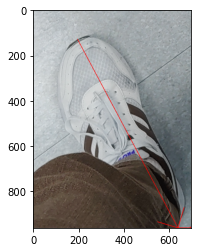

In [13]:
img_t.find_want_arr()

In [14]:
img_t.find_angle([128, 196],[960, 640])

93.52602994538066

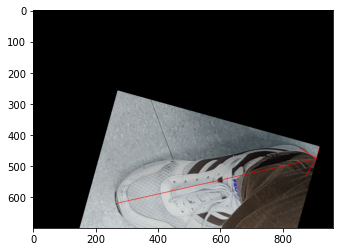

In [15]:
img_t.rotated()

In [103]:
b = img_t.rotated()

In [104]:
b.shape

(698, 961, 3)

In [105]:
b[0][0]

array([0, 0, 0], dtype=uint8)

## 테스트 2. y_2>y_1일 때 line_1의 값에 -1을 곱하기. 
 - y_2>y_1일 때 line_1의 값에 -1을 곱해, 좌표에서의 각도가 90보다 클 경우 90보다 각도가 큰 것을 인지시켜, 회전시키기

In [11]:
# 이미지 돌리기 전 까지의 코드
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from copy import copy

class rotated_img : 

    def __init__(self, path):
        self.path = path
        self.file_name = path.split('/')[-1]
        self.img = cv2.imread(path, cv2.IMREAD_COLOR)
                
        
    def kp_dist(self,a_list,b_list): 
        x_1, x_2 = a_list
        y_1, y_2 = b_list
        distance = (math.sqrt((x_1 - y_1)**2 +(x_2 - y_2)**2))
    
        return distance   
        
    def find_angle (self, list_1, list_2):
        x_1, y_1 = list_1 # 첫번 째 점
        x_2, y_2 = list_2 # 중앙에 있는 점
        
        # 마지막 점 생성하기
        x_3, y_3 = x_2, self.img.shape[1]

        if y_2 > y_1 : 
            line_1 = (-1) * math.sqrt((x_2 - x_1)**2 +(y_2 - y_1)**2)
            line_2 = y_3 - y_2
        else : 
            line_1 = math.sqrt((x_2 - x_1)**2 +(y_2 - y_1)**2)
            line_2 = y_3 - y_2
        
        angle = float(np.rad2deg(np.arccos(line_2/line_1)))

        return angle
        
    def find_want_arr(self):
    
        ## GaussianBlur를 통한 이미지 노이즈 제거
        img_gaus = cv2.GaussianBlur(self.img, (13,13),0)

        ## Canny를 통한 테두리 찾기
        img_canny = cv2.Canny(img_gaus,50, 120)
        
        # 값이 255인, canny를 통해 출력된 테두리 값을 저장하기
        kp_list = []
        for i in range(img_canny.shape[0]):
            for j in range(img_canny.shape[1]):
                  if img_canny[i][j]== 255:
                        kp_list.append([i, j])
        max_dist = 0
        max_pt = []
        
        ilist = copy(kp_list)
        for i,kp in enumerate(kp_list) : 
            for j in range(i, len(ilist)) : 
                dist = self.kp_dist(kp, ilist[j])
          
                if dist > max_dist : 
                    max_dist = dist
                    max_pt = []
                    max_pt.append(kp)
                    max_pt.append(kp_list[j])
                    
        x_1, y_1 = max_pt[0]
        x_2, y_2 = max_pt[1]
        x_3, y_3 = x_2, self.img.shape[1]
            
        copy_img = self.img
        im_arr = cv2.arrowedLine(copy_img, (y_1,x_1), (y_2, x_2), (255,0,0), 2)
        im_arr = cv2.arrowedLine(im_arr, (y_2, x_2), (y_3, x_3),(255,0,0), 2)
        print(max_pt[0], max_pt[1])

        plt.imshow(im_arr)
    
    def rotated (self) :
    
        ## GaussianBlur를 통한 이미지 노이즈 제거
        img_gaus = cv2.GaussianBlur(self.img, (13,13),0)

        ## Canny를 통한 테두리 찾기
        img_canny = cv2.Canny(img_gaus,50, 120)
        
        # 값이 255인, canny를 통해 출력된 테두리 값을 저장하기
        kp_list = []
        for i in range(img_canny.shape[0]):
            for j in range(img_canny.shape[1]):
                  if img_canny[i][j]== 255:
                        kp_list.append([i, j])
        max_dist = 0
        max_pt = []
        
        for i,kp in enumerate(kp_list) : 
            for j in range(i, len(kp_list)) : 
                dist = self.kp_dist(kp, kp_list[j])
                if dist > max_dist : 
                    max_dist = dist
                    max_pt = []
                    max_pt.append(kp)
                    max_pt.append(kp_list[j])
                    
        x_1, y_1 = max_pt[0]
        x_2, y_2 = max_pt[1]
        
        list_x = [y_1, x_1]
        list_y = [y_2, x_2]
        img_angle = self.find_angle(list_x, list_y)
        
        half_x = int((x_2 + x_1)/2)
        half_y = int((y_2 + y_1)/2)
        rot_matrix= cv2.getRotationMatrix2D((half_x,half_y), img_angle, 0.7)
        
        
        img_w, img_h =   self.img.shape[0], self.img.shape[1]
        
        rotated_im = cv2.warpAffine(self.img, rot_matrix, (img_w, img_h))
        plt.imshow(rotated_im)
        #cv2.imwrite(f'data_new/rotated_{self.file_name}.jpg',rotated_im)
        #print("Image Saving is Complete")
        #print("***"*7)


In [12]:
img_t = rotated_img('data_new/obj_num_2.jpg')

[128, 196] [960, 640]


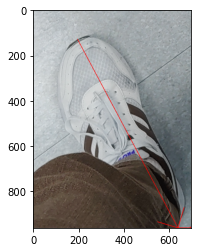

In [13]:
img_t.find_want_arr()

In [14]:
img_t.find_angle([128, 196],[960, 640])

93.52602994538066

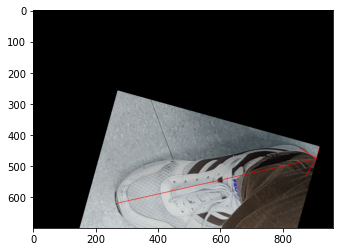

In [15]:
img_t.rotated()

In [16]:
img_t_0 = rotated_img('data_new/obj_num_0.jpg')

[0, 436] [598, 141]


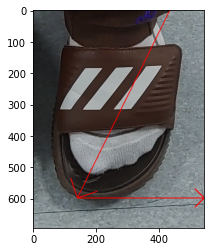

In [17]:
img_t_0.find_want_arr()

In [18]:
img_t_0.find_angle([0, 436], [598, 141])

52.70822375640569

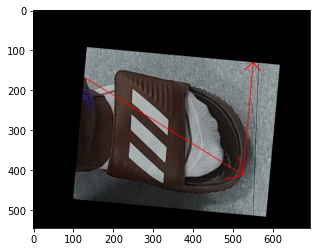

In [19]:
img_t_0.rotated()

In [20]:
img_t_1 = rotated_img('data_new/obj_num_1.jpg')

[62, 163] [861, 460]


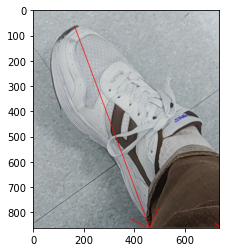

In [21]:
img_t_1.find_want_arr()

In [22]:
img_t_1.find_angle([62, 163],[861, 460])

109.03420268990273

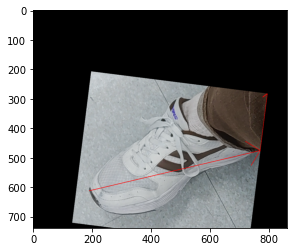

In [23]:
img_t_1.rotated()

In [136]:
b.shape

(698, 961, 3)

In [134]:
non_x = 0
c = 0
for i in range(b.shape[0]) :
    if c == 0 : 
        for j in range(b.shape[1]) :
                if np.all(b[i][j] != 0) :
                    non_x = i
                    c += 1
                    print(non_x)
                    break
print("Hello")

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]
234
Hello


In [129]:
change_x = int(234/2)
print(change_x)

117


In [138]:
move_img = np.zeros((698, 961, 3), dtype = np.uint8)

In [140]:
move_img.shape[0]

698

In [145]:
for i in range(move_img.shape[0]):
    for j in range(move_img.shape[1]):
        if i + 117 < 698 :
            move_img[i][j] = b[i+117][j]
            
        

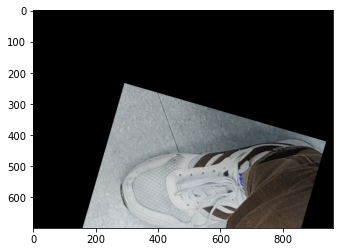

In [146]:
plt.imshow(b)

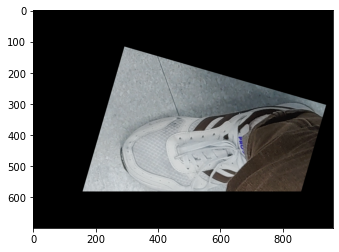

In [147]:
plt.imshow(move_img)

In [118]:
non_y_list

[292]

In [81]:
b[26][5][0]

0

In [91]:
n = 0
k = 0
list_n = [1,2,3]
while n< 1 :
    if list_n[k] > 0 : 
        print("hello")
        n += 1
        k += 1
    

hello


In [16]:
img_t_0 = rotated_img('data_new/obj_num_0.jpg')

[0, 436] [598, 141]


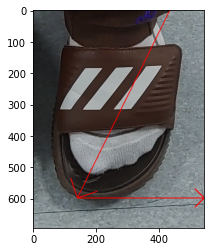

In [17]:
img_t_0.find_want_arr()

In [18]:
img_t_0.find_angle([0, 436], [598, 141])

52.70822375640569

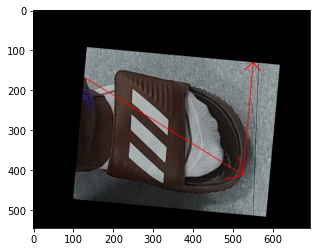

In [19]:
img_t_0.rotated()

In [20]:
img_t_1 = rotated_img('data_new/obj_num_1.jpg')

[62, 163] [861, 460]


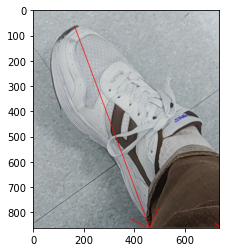

In [21]:
img_t_1.find_want_arr()

In [22]:
img_t_1.find_angle([62, 163],[861, 460])

109.03420268990273

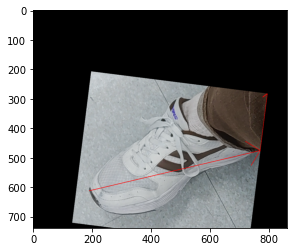

In [23]:
img_t_1.rotated()

## 테스트 3. 테스트 2 + 그림 크기 조정 (완료)
 - y_2>y_1일 때 line_1의 값에 -1을 곱해, 좌표에서의 각도가 90보다 클 경우 90보다 각도가 큰 것을 인지시켜, 회전시키기

In [17]:
# 이미지 돌리기 전 까지의 코드
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from copy import copy

class rotated_img : 

    def __init__(self, path):
        self.path = path
        self.file_name = path.split('/')[-1]
        self.img = cv2.imread(path, cv2.IMREAD_COLOR)
        print(self.img.shape)
                
        
    def kp_dist(self,a_list,b_list): 
        x_1, x_2 = a_list
        y_1, y_2 = b_list
        distance = (math.sqrt((x_1 - y_1)**2 +(x_2 - y_2)**2))
    
        return distance   
    
    # 이미지 배열 찾는 함수
    def make_img_list(self, image) : 
        # 비어있지 않은 최소 x값 찾기 (이미지를 위로 올리기 위해서)
        # 비어있지 않는 최소 y값 찾기 (이미지를 위로 왼쪽으로 정렬하기 위해서)
        find_x_list = []
        find_y_list = []
        for i in range(image.shape[0]) :
            for j in range(image.shape[1]) :
                    if np.all(image[i][j] != 0) :
                        find_x_list.append(i)
                        find_y_list.append(j)
                        
        return find_x_list, find_y_list
        
    def find_angle (self, list_1, list_2):
        x_1, y_1 = list_1 # 첫번 째 점
        x_2, y_2 = list_2 # 중앙에 있는 점
        
        # 마지막 점 생성하기
        x_3, y_3 = x_2, self.img.shape[1]
        
        # 일반적으로 cv2.imshow 실행시, 세로축이 x, 가로축이 y의 값을 갖는다.
        # line_1, line_2의 값은 양수이므로 line_2/line_1의 값이 양수일 때에,
        # arccos가 항상 90이하의 값을 추출한다. 때문에, 첫번 째 점과 두번째 점이 이루는 각도가 90를 넘는 경우를 고려해, line_1에
        # -1의 값을 곱해준다,

        if y_2 > y_1 : 
            line_1 = (-1) * math.sqrt((x_2 - x_1)**2 +(y_2 - y_1)**2)
            line_2 = y_3 - y_2
        else : 
            line_1 = math.sqrt((x_2 - x_1)**2 +(y_2 - y_1)**2)
            line_2 = y_3 - y_2
        
        angle = float(np.rad2deg(np.arccos(line_2/line_1)))

        return angle
        
    def find_want_arr(self):
    
        ## GaussianBlur를 통한 이미지 노이즈 제거
        img_gaus = cv2.GaussianBlur(self.img, (13,13),0)

        ## Canny를 통한 테두리 찾기
        img_canny = cv2.Canny(img_gaus,50, 120)
        
        # 값이 255인, canny를 통해 출력된 테두리 값을 저장하기
        kp_list = []
        for i in range(img_canny.shape[0]):
            for j in range(img_canny.shape[1]):
                  if img_canny[i][j]== 255:
                        kp_list.append([i, j])
        max_dist = 0
        max_pt = []
        
        ilist = copy(kp_list)
        for i,kp in enumerate(kp_list) : 
            for j in range(i, len(ilist)) : 
                dist = self.kp_dist(kp, ilist[j])
          
                if dist > max_dist : 
                    max_dist = dist
                    max_pt = []
                    max_pt.append(kp)
                    max_pt.append(kp_list[j])
                    
        x_1, y_1 = max_pt[0]
        x_2, y_2 = max_pt[1]
        x_3, y_3 = x_2, self.img.shape[1]
            
        copy_img = self.img
        im_arr = cv2.arrowedLine(copy_img, (y_1,x_1), (y_2, x_2), (255,0,0), 2)
        im_arr = cv2.arrowedLine(im_arr, (y_2, x_2), (y_3, x_3),(255,0,0), 2)
        print(max_pt[0], max_pt[1])

        plt.imshow(im_arr)
    
    def rotated (self) :
    
        ## GaussianBlur를 통한 이미지 노이즈 제거
        img_gaus = cv2.GaussianBlur(self.img, (13,13),0)

        ## Canny를 통한 테두리 찾기
        img_canny = cv2.Canny(img_gaus,50, 120)
        
        # 값이 255인, canny를 통해 출력된 테두리 값을 저장하기
        kp_list = []
        for i in range(img_canny.shape[0]):
            for j in range(img_canny.shape[1]):
                  if img_canny[i][j]== 255:
                        kp_list.append([i, j])
        max_dist = 0
        max_pt = []
        
        for i,kp in enumerate(kp_list) : 
            for j in range(i, len(kp_list)) : 
                dist = self.kp_dist(kp, kp_list[j])
                if dist > max_dist : 
                    max_dist = dist
                    max_pt = []
                    max_pt.append(kp)
                    max_pt.append(kp_list[j])
                    
        x_1, y_1 = max_pt[0]
        x_2, y_2 = max_pt[1]
        
        list_x = [y_1, x_1]
        list_y = [y_2, x_2]
        img_angle = self.find_angle(list_x, list_y)
        
        half_x = int((x_2 + x_1)/2)
        half_y = int((y_2 + y_1)/2)
        rot_matrix= cv2.getRotationMatrix2D((half_x,half_y), img_angle, 0.7)
        # 이미지 회전
        img_w, img_h =   int(1.5 *self.img.shape[0]), int(1.5*self.img.shape[1])
        rotated_im = cv2.warpAffine(self.img, rot_matrix, (img_w, img_h))
        
        # 이동할 이미지 틀 만들기
        move_img = np.zeros((self.img.shape[1],self.img.shape[0], 3), dtype = np.uint8)
        
        
        find_rotated_x, find_rotated_y =self.make_img_list(rotated_im)
        # 비어있지 않은 최소 x값 찾기 (이미지를 위로 올리기 위해서)

        find_x = min(find_rotated_x)
        find_y = min(find_rotated_y)
        
        # rotated_im를 x축,y축 만큼 옮겨주기
        for i in range(move_img.shape[0]):
            for j in range(move_img.shape[1]):
                move_img[i][j] = rotated_im[i+find_x][j+find_y]
        
        
        # 불필요한 이미지 내용 제거하기불필요한 이미지 내용 제거하기
        # 지금까지 이미지는 x축, y축으로 최대한 옮겨진 상태로 저장되었다. 이제 불필요한 x, y 값을 제거해보자
        # 비어있지 않은 이미지 찾기
        find_move_x, find_move_y = self.make_img_list(move_img)
        
        # x축 제거하기
        find_x_max = max(find_move_x)
        for i in range(find_x_max+1,move_img.shape[0]):
            move_img = np.delete(move_img,find_x_max+1, axis = 0)        

        #y축 제거하기

        find_y_max = max(find_move_y)
        for i in range(find_y_max+1,move_img.shape[1]):
             move_img = np.delete(move_img,find_y_max+1, axis = 1)

        
        return move_img
        #rotated_im
        #cv2.imwrite(f'data_new/rotated_{self.file_name}.jpg',rotated_im)
        #print("Image Saving is Complete")
        #print("***"*7)


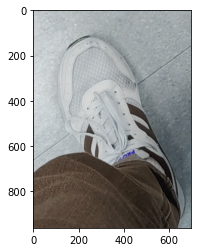

In [7]:
img_n = cv2.imread('data_new/obj_num_2.jpg')
plt.imshow(img_n)

In [18]:
img_t = rotated_img('data_new/obj_num_2.jpg')

(961, 698, 3)


In [19]:
img = img_t.rotated()

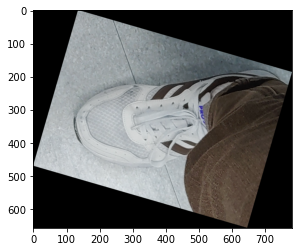

In [21]:
plt.imshow(img)

In [ ]:
plt.imshow(img)

In [447]:
find_y_list = []
for i in range(img.shape[0]) :
    for j in range(img.shape[1]) :
                if np.all(img[i][j] != 0) :
                    find_y_list.append(j)
                    

In [449]:
max(find_y_list)

781

In [373]:
img_t = img

In [280]:
img_t = rotated_img('data_new/obj_num_2.jpg')

(961, 698, 3)


In [281]:
img = img_t.rotated()

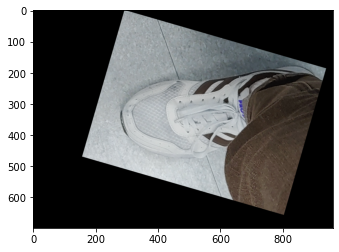

In [282]:
plt.imshow(img)

In [22]:
img_t_0 = rotated_img('data_new/obj_num_0.jpg')

(694, 545, 3)


In [23]:
img = img_t_0.rotated()


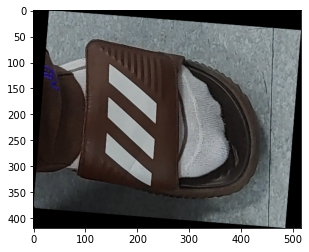

In [24]:
plt.imshow(img)

In [25]:
img_t_1 = rotated_img('data_new/obj_num_1.jpg')

(862, 738, 3)


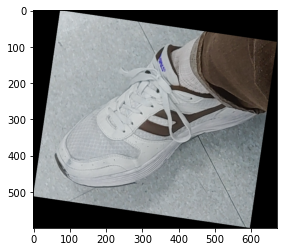

In [26]:
img = img_t_1.rotated()
plt.imshow(img)

In [373]:
img_t = img

In [367]:
img_list = []
for i in range(img_t.shape[0]):
    for j in range(img_t.shape[1]):
            if np.all(img_t[i][j]!=0) :
                img_list.append([i,j])

In [355]:
len(img_list)

312155

In [369]:
min_num = img_list[0][1]
for i in range(len(img_list)):
    if img_list[i][1] < min_num :
        min_num = img_list[i][1]

In [370]:
print(min_num)


199


In [376]:
img_t = img

In [377]:
for i in range(min_num):
    img_t = np.delete(img_t,0, axis = 1)

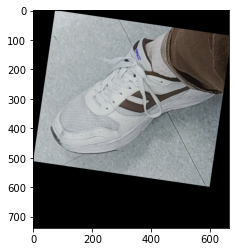

In [378]:
plt.imshow(img_t)

In [379]:
img_list_x = []
for i in range(img_t.shape[0]):
    for j in range(img_t.shape[1]):
            if np.all(img_t[i][j]!=0) :
                img_list_x.append([i,j])

In [381]:
max_num = img_list_x[0][0]
for i in range(len(img_list_x)):
    if img_list_x[i][0] > max_num :
        max_num = img_list_x[i][0]


In [384]:
max_num

598

In [385]:
img_tt.shape

(738, 663, 3)

In [391]:
img_tt=img_t 

In [392]:
for i in range(max_num+1,img_tt.shape[0]):
    img_tt = np.delete(img_tt,max_num+1, axis = 0)

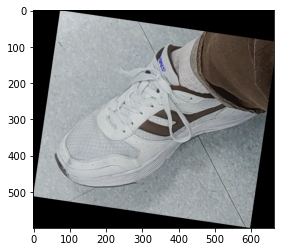

In [393]:
plt.imshow(img_tt)

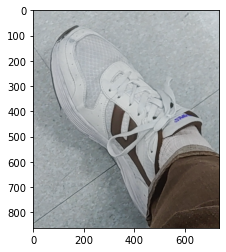

In [246]:
img_n = cv2.imread('data_new/obj_num_1.jpg')
plt.imshow(img_n)

In [52]:
img_t_1 = rotated_img('data_new/obj_num_1.jpg')

(862, 738, 3)
0.8561484918793504


In [ ]:
img_t_1.find_angle([62, 163],[861, 460])

In [ ]:
img_t_1.rotated()

In [320]:
b = np.array([1,2,3,0,0, 1,2,3,0,0, 1,2,3,0,0,1,2,3,0,0,0,0,0,0,0,0,0,0,0,0]).reshape(6,5)

In [321]:
b

array([[1, 2, 3, 0, 0],
       [1, 2, 3, 0, 0],
       [1, 2, 3, 0, 0],
       [1, 2, 3, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [332]:
b_list = []
for i in range(b.shape[0]):
    for j in range(b.shape[1]):
            if np.all(b[i][j]!=0) :
                b_list.append([i,j])
print(b_list)

[[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2], [3, 0], [3, 1], [3, 2]]


In [333]:
max_num = b_list[0][1]
for i in range(len(b_list)):
    if b_list[i][1] > max_num :
        max_num = b_list[i][1]
        
print(max_num)


2


In [329]:
len(b_list), len(b[0])

(12, 5)

In [335]:
for i in range(max_num+1, len(b[0])):
    b = np.delete(b,max_num+1, axis = 1)

In [336]:
b

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [0, 0, 0],
       [0, 0, 0]])

In [337]:
b_list = []
for i in range(b.shape[0]):
    for j in range(b.shape[1]):
            if np.all(b[i][j]!=0) :
                b_list.append([i,j])
print(b_list)

[[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2], [3, 0], [3, 1], [3, 2]]


In [403]:
min(b_list)

[0, 0]

In [400]:
b_list[0]

[0, 0]

In [342]:
b_list[0][0]

0

In [343]:
max_num = b_list[0][0]
for i in range(len(b_list)):
    if b_list[i][0] > max_num :
        max_num = b_list[i][0]
        
print(max_num)

3


In [347]:
for i in range(max_num+1, len(b)):
    b = np.delete(b,max_num+1, axis = 0)

In [348]:
b

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [271]:
img_t = rotated_img('data_new/obj_num_2.jpg')

(961, 698, 3)


In [272]:
img = img_t.rotated()

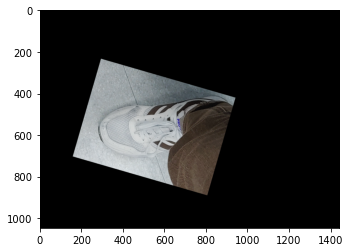

In [273]:
plt.imshow(img)

In [220]:
a = np.delete(a,3,axis = 0)
a

array([[1, 2, 3, 0, 0],
       [1, 2, 3, 0, 0],
       [1, 2, 3, 0, 0]])

In [221]:
a = np.delete(a,3,axis = 1)
a

array([[1, 2, 3, 0],
       [1, 2, 3, 0],
       [1, 2, 3, 0]])

In [222]:
a = np.delete(a,3,axis = 1)
a

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

## * 함수 실행하기 (rotated_img.py) 

In [27]:
from rotated_img import rotated_img

In [28]:
import cv2
import matplotlib.pyplot as plt

In [29]:
img_path = 'data_new/obj_num_2.jpg'
a = rotated_img(img_path)

(961, 698, 3)


[128, 196] [960, 640]


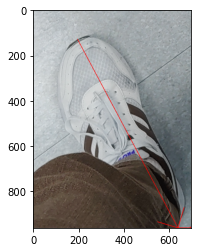

In [4]:
a.find_want_arr()

In [30]:
a.rotated()

Image Saving is Complete
*********************


In [31]:
img_path = 'data_new/obj_num_0.jpg'
b = rotated_img(img_path)

(694, 545, 3)


In [32]:
b.rotated()

Image Saving is Complete
*********************


In [33]:
img_path = 'data_new/obj_num_1.jpg'
c = rotated_img(img_path)

(862, 738, 3)


In [34]:
c.rotated()

Image Saving is Complete
*********************
